In [3]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

import qiskit
from qiskit_experiments.library.characterization.t2hahn import T2Hahn


In [4]:
qubit = 0
conversion_factor = 1e-6 # our delay will be in micro-sec
delays = list(range(0, 50, 1) )
delays = [float(_) * conversion_factor for _ in delays]
number_of_echoes = 1

# Create a T2Hahn experiment. Print the first circuit as an example
exp1 = T2Hahn(physical_qubits=(qubit,), delays=delays, num_echoes=number_of_echoes)
print(exp1.circuits()[0])

     ┌─────────┐┌───────────────┐┌───────┐┌───────────────┐┌─────────┐┌─┐
  q: ┤ Rx(π/2) ├┤ Delay(0.0[s]) ├┤ Rx(π) ├┤ Delay(0.0[s]) ├┤ Rx(π/2) ├┤M├
     └─────────┘└───────────────┘└───────┘└───────────────┘└─────────┘└╥┘
c: 1/══════════════════════════════════════════════════════════════════╩═
                                                                       0 


In [5]:
from qiskit_experiments.test.t2hahn_backend import T2HahnBackend

estimated_t2hahn = 20 * conversion_factor
# The behavior of the backend is determined by the following parameters
backend = T2HahnBackend(
    t2hahn=[estimated_t2hahn],
    frequency=[100100],
    initialization_error=[0.0],
    readout0to1=[0.02],
    readout1to0=[0.02],
)

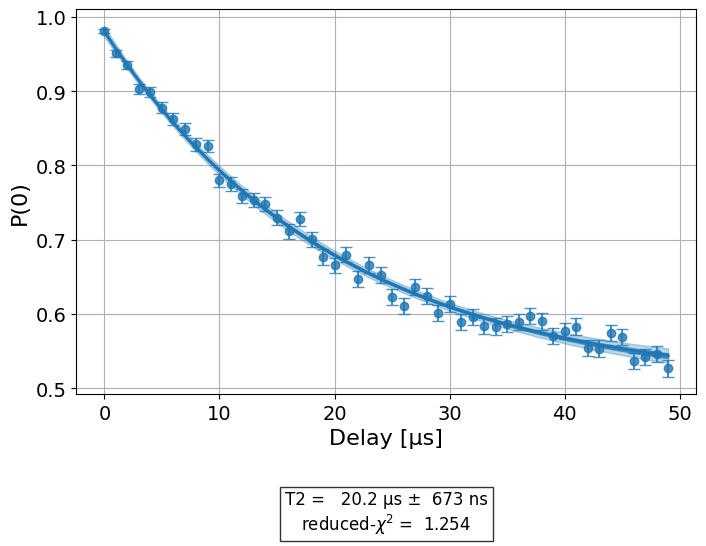

In [6]:
exp1.analysis.set_options(p0=None, plot=True)
expdata1 = exp1.run(backend=backend, shots=2000, seed_simulator=101)
expdata1.block_for_results()  # Wait for job/analysis to finish.

# Display the figure
display(expdata1.figure(0))


In [7]:
for result in expdata1.analysis_results():
    print(result)

AnalysisResult
- name: @Parameters_T2HahnAnalysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 1
  * F_exp_decay(x) = amp * exp(-x/tau) + base
 - success: True
 - number of function evals: 9
 - degree of freedom: 47
 - chi-square: 58.93800897132207
 - reduced chi-square: 1.254000190879193
 - Akaike info crit.: 14.223159535444607
 - Bayesian info crit.: 19.959228551729044
 - init params:
  * amp = 0.45427286356821583
  * tau = 8.612552938252412e-05
  * base = 0.5269865067466267
 - fit params:
  * amp = 0.4784531207277373 ± 0.006360233372713836
  * tau = 2.0209111781060115e-05 ± 6.730935790446901e-07
  * base = 0.501561505278777 ± 0.006798163279389276
 - correlations:
  * (amp, base) = -0.9385042949008475
  * (tau, base) = -0.9334420103530475
  * (amp, tau) = 0.81119439760793
- quality: good
- device_components: ['Q0']
- verified: False
AnalysisResult
- name: T2
- value: (2.02+/-0.07)e-05
- χ²: 1.254000190879193
- quality: good
- extra: <1 items>
- d

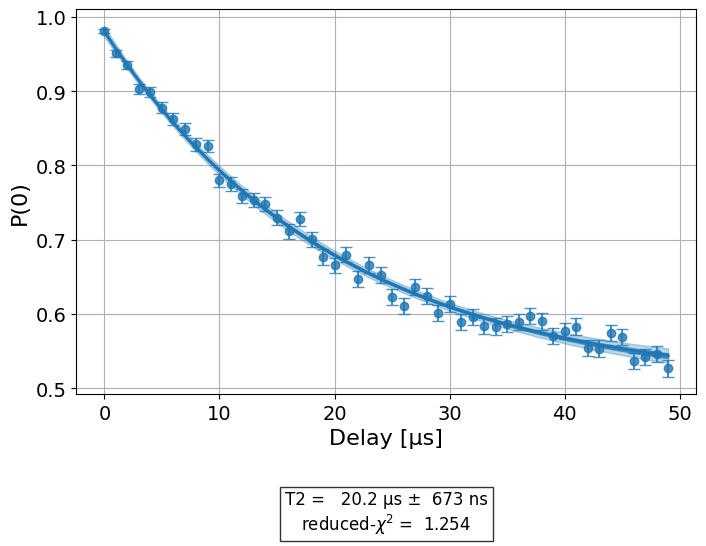

In [8]:
exp_with_p0 = T2Hahn(physical_qubits=[qubit], delays=delays, num_echoes=number_of_echoes)
exp_with_p0.analysis.set_options(p0={"amp": 0.5, "tau": estimated_t2hahn, "base": 0.5})
expdata_with_p0 = exp_with_p0.run(backend=backend, shots=2000, seed_simulator=101)
expdata_with_p0.block_for_results()

# Display fit figure
display(expdata_with_p0.figure(0))